# Location Scouting for a Business close to Railway Stations (London)

## Introduction

We are accustomed to seeing stores and other forms of businesses in airports, be it duty free stores and restaurants/bars. Train stations on the other hand, do not have the space to have such establishments within the train station.

With some high-street stores across London announcing plans to open new branches in the immediate vicinity of transport hubs - particularly, railway stations, it is prudent to analyse the kinds of businesses operating in the area. This decision to expand to railway stations is partly as a result of increasing passenger journeys each year for the past 20 years. An analysis of most visited businesses close to railway stations will help some companies or individuals decide on how to take advantage of the yearly increase in passenger traffic.

Venues within 500 metres of the top 10 busiest railway stations in London will be explored

In [1]:
# pip install lxml

### Libraries

In [2]:
# import required libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


## Data 

The data for the top 10 busiest railway stations will be obtained from a wikipedia document that contains a complete list of the busiest railway stations in Great Britain. The top 10 railway stations are then pulled from the original list.

The venues and their various categories close to the railway stations will be obtained using Foursquare

In [3]:
# import table of the busiest railway stations in Great Britain 
gb = pd.read_html('https://en.wikipedia.org/wiki/List_of_busiest_railway_stations_in_Great_Britain')
gb = gb[0]

In [4]:
gb.head(5)

,Rank,Railway Station,Annual entries/exits(millions)2019-20,Annual interchanges (millions) 2019-20,Location,Main Services,Number of platforms,Interchange systems,Image
0,1,London Waterloo,86.904,6.310,London,South Western Main LineWest of England Main Line,24 (Platforms 25 and 26 are part of the Underg...,London Underground,NaN
1,2,London Victoria,73.559,5.756,London,Brighton Main LineChatham Main Line,19,London Underground,NaN
2,3,London Liverpool Street,65.985,4.351,London,Great Eastern Main LineWest Anglia Main Line,18,"London Underground, London Overground, TfL Rail",NaN
3,4,London Bridge,63.095,10.678,London,South Eastern Main LineBrighton Main LineThame...,15,London Underground,NaN
4,5,Birmingham New Street,46.511,6.994,Birmingham,West Coast Main LineCross Country Route,13,West Midlands Metro,NaN


In [5]:
# Selecting only railway stations in London 
lndn = gb[gb['Location'] == 'London'].reset_index(drop = True)
lndn.head()

,Rank,Railway Station,Annual entries/exits(millions)2019-20,Annual interchanges (millions) 2019-20,Location,Main Services,Number of platforms,Interchange systems,Image
0,1,London Waterloo,86.904,6.310,London,South Western Main LineWest of England Main Line,24 (Platforms 25 and 26 are part of the Underg...,London Underground,NaN
1,2,London Victoria,73.559,5.756,London,Brighton Main LineChatham Main Line,19,London Underground,NaN
2,3,London Liverpool Street,65.985,4.351,London,Great Eastern Main LineWest Anglia Main Line,18,"London Underground, London Overground, TfL Rail",NaN
3,4,London Bridge,63.095,10.678,London,South Eastern Main LineBrighton Main LineThame...,15,London Underground,NaN
4,6,London Paddington,44.870,2.98,London,Great Western Main LineSouth Wales Main LineRe...,13 (Platforms 15 and 16 are part of the Underg...,"London Underground, TfL Rail",NaN


In [6]:
lndn_10 = lndn.iloc[0:10, 1:2]
lndn_10.iloc[6].replace({'Stratford': 'London Stratford'}, inplace = True)
lndn_10

,Railway Station
0,London Waterloo
1,London Victoria
2,London Liverpool Street
3,London Bridge
4,London Paddington
5,London Euston
6,London Stratford
7,London St Pancras International
8,London King's Cross
9,Highbury and Islington


An empty dataframe is created to contain the coordinates of the railway stations. A function is  created to loop through the various railway stations for the coordinates, which is then added to the newly created dataframe.

In [7]:
# New dataframe for coordinates of the railway stations
cols = ['Latitude', 'Longitude']
coords = pd.DataFrame(columns = cols)
coords

,Latitude,Longitude


In [8]:
# Obtain the coordinates for each railway station 
for stat in zip(lndn_10['Railway Station']):
    address = '{}'.format(stat)
    geolocator = Nominatim(user_agent="lndn_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    coords = coords.append({'Latitude': latitude,'Longitude': longitude}, ignore_index = True)

In [9]:
coords

,Latitude,Longitude
0,51.502838,-0.112801
1,51.494733,-0.144580
2,51.518043,-0.081773
3,51.508049,-0.087672
4,51.517086,-0.177542
5,51.528808,-0.134255
6,51.541289,-0.003547
7,51.531891,-0.126851
8,51.532395,-0.123022
9,51.546368,-0.103654


The table below shows the top ten busiest railway stations in London along with their coordinates.

In [10]:
# Complete table of the top ten busiest railway stations with coordinates
lndn_10 = pd.concat([lndn_10, coords], axis = 1)
lndn_10

,Railway Station,Latitude,Longitude
0,London Waterloo,51.502838,-0.112801
1,London Victoria,51.494733,-0.144580
2,London Liverpool Street,51.518043,-0.081773
3,London Bridge,51.508049,-0.087672
4,London Paddington,51.517086,-0.177542
5,London Euston,51.528808,-0.134255
6,London Stratford,51.541289,-0.003547
7,London St Pancras International,51.531891,-0.126851
8,London King's Cross,51.532395,-0.123022
9,Highbury and Islington,51.546368,-0.103654


The getNearbyVenues function is used to loop through all railway stations and return a list of nearby venues for each station. The maximum number of venues for each railway station is set to 100.

In [11]:
CLIENT_ID = 'MZ2Y4YZZ11TT0HSYI22QO33YOLCPESO35GPHBNCRDEBLOEIP' # your Foursquare ID
CLIENT_SECRET = 'JMI523AA1LRZZODQITHEPTKWT5LY4S241LD4B4IVP5YO0VHH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MZ2Y4YZZ11TT0HSYI22QO33YOLCPESO35GPHBNCRDEBLOEIP
CLIENT_SECRET:JMI523AA1LRZZODQITHEPTKWT5LY4S241LD4B4IVP5YO0VHH


In [12]:
# Get a maximum of 100 nearby venues within 500 metres of the railway stations 
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Railway Station', 
                  'Railway Station Latitude', 
                  'Railway Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
top_10_venues = getNearbyVenues(names = lndn_10['Railway Station'],
                                   latitudes = lndn_10['Latitude'],
                                   longitudes = lndn_10['Longitude']
                                  )

London Waterloo
London Victoria
London Liverpool Street
London Bridge
London Paddington
London Euston
London Stratford
London St Pancras International
London King's Cross
Highbury and Islington


The table below shows the first five rows of venues close to London Waterloo Station which includes the category and coordinates.  

In [14]:
top_10_venues.head()

,Railway Station,Railway Station Latitude,Railway Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,London Waterloo,51.502838,-0.112801,The Old Vic,51.502176,-0.109686,Theater
1,London Waterloo,51.502838,-0.112801,ODEON BFI IMAX,51.504995,-0.113529,Movie Theater
2,London Waterloo,51.502838,-0.112801,Vaulty Towers,51.501188,-0.111909,Bar
3,London Waterloo,51.502838,-0.112801,Konditor & Cook Ltd,51.504292,-0.110387,Cupcake Shop
4,London Waterloo,51.502838,-0.112801,House of Vans,51.500678,-0.113944,Skate Park


In [15]:
top_10_venues.reset_index(inplace = True)

In [16]:
print('Total number of venues within 500 meetres of the top 10 busiest railway stations in London: {}'.format(top_10_venues.shape[0]))

Total number of venues within 500 meetres of the top 10 busiest railway stations in London: 713


The total number of venues obtained from the function is 721. These venues will be explored and used in analysis.

## Methodology

To begin exploring each railway station's venues, the total number of venues returned for each railway station can be shown in the table below.

In [17]:
top_10_summary = top_10_venues.groupby('Railway Station').count().reset_index()

In [18]:
# Show total number of venues returned for each railway station
top_10_summary = top_10_summary[['Railway Station', 'Venue']]
top_10_summary.rename(columns = {'Venue': 'Venues'}, inplace = True)
top_10_summary.sort_values(by = 'Venues', inplace = True, ascending = False)
top_10_summary.reset_index(inplace = True)
top_10_summary.drop('index', axis=1, inplace = True)
top_10_summary

,Railway Station,Venues
0,London Victoria,100
1,London Waterloo,100
2,London Paddington,93
3,Highbury and Islington,78
4,London Liverpool Street,68
5,London Stratford,67
6,London Bridge,64
7,London King's Cross,51
8,London St Pancras International,47
9,London Euston,45


The summary of total venues for each railway station shows London Waterloo and London Victoria having the most venues in close proximity and London Euston having the least venues.

The location of the railway stations is superimposed on a map of London.

In [19]:
address = 'London'

geolocator = Nominatim(user_agent="ldn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [20]:
# create map of New York using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, station in zip(lndn_10['Latitude'], lndn_10['Longitude'], lndn_10['Railway Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

The venue categories are grouped according to each station and the frequency of encountering each venue category at each station can be shown.

In [21]:
# one hot encoding
ldn_onehot = pd.get_dummies(top_10_venues[['Venue Category']], prefix="", prefix_sep="")

# add railway station column back to dataframe
ldn_onehot['Railway Station'] = top_10_venues['Railway Station'] 

# move railway station column to the first column
fixed_columns = [ldn_onehot.columns[-1]] + list(ldn_onehot.columns[:-1])
ldn_onehot = ldn_onehot[fixed_columns]

railway_grouped = ldn_onehot.groupby('Railway Station').sum().reset_index()
railway_grouped.head()

,Railway Station,African Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,Bakery,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Canal,Canal Lock,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Herbs & Spices Store,Himalayan Restaurant,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Movie Theater,Museum,Music Venue,Newsagent,Noodle House,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shopping Plaza,Skate Park,South American Restaurant,Souvenir Shop,Speakeasy,Sports Bar,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Highbury and Islington,0,0,0,0,1,0,0,4,1,1,0,0,0,1,0,0,0,0,0,0,1,10,0,0,0,0,0,0,0,0,3,9,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0,0,0,0,1,1,0,0,5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,3,0,0,0,0,1,1,1,0,0,0,0,9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0
1,London Bridge,0,0,0,0,0,1,0,2,1,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,1,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,2,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,3,0,3,0,0,1,0,2,1,0,3,0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0
2,London Euston,1,0,0,0,0,0,0,0,1,2,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,1,0,2,0,0,3,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,London King's Cross,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,2,0,0,0,1,0,4,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,1,4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,2,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0
4,London Liverpool Street,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,3,0,0,0,0,2,0,0,2,4,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,5,0,3,0,0,0,0,0,0,0,0,2,0,0,1,0,3,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0

In [22]:
# Group rows by railway station and taking the mean of the frequency of occurrence of each category
ldn_grouped = ldn_onehot.groupby('Railway Station').mean().reset_index()
ldn_grouped.head()

,Railway Station,African Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,Bakery,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Canal,Canal Lock,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Herbs & Spices Store,Himalayan Restaurant,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Movie Theater,Museum,Music Venue,Newsagent,Noodle House,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shopping Plaza,Skate Park,South American Restaurant,Souvenir Shop,Speakeasy,Sports Bar,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Highbury and Islington,0.000000,0.0,0.0,0.000000,0.012821,0.000000,0.0,0.051282,0.012821,0.012821,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.012821,0.128205,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.038462,0.115385,0.0,0.012821,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.012821,0.012821,0.000000,0.000000,0.012821,0.000000,0.0,0.000000,0.012821,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.012821,0.012821,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.012821,0.000000,0.0,0.025641,0.000000,0.012821,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.012821,0.0,0.0,0.064103,0.0,0.000000,0.012821,0.0,0.0,0.0,0.0,0.000000,0.0,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.0,0.000000,0.012821,0.0,0.0,0.0,0.0,0.038462,0.000000,0.000000,0.0,0.000000,0.012821,0.012821,0.012821,0.000000,0.0,0.0,0.0,0.115385,0.0,0.000000,0.0,0.000000,0.012821,0.0,0.00000,0.000000,0.0,0.012821,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.012821,0.000000,0.0,0.0,0.000000,0.012821,0.0,0.012821,0.012821,0.0,0.012821,0.0,0.000000,0.000000,0.012821,0.000000
1,London Bridge,0.000000,0.0,0.0,0.000000,0.000000,0.015625,0.0,0.031250,0.015625,0.000000,0.015625,0.015625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.031250,0.000000,0.000000,0.000000,0.0,0.0,0.015625,0.015625,0.0,0.0,0.000000,0.015625,0.093750,0.0,0.000000,0.015625,0.0,0.0,0.000000,0.015625,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.015625,0.015625,0.000000,0.000000,0.0,0.015625,

With the mean of frequency of encountering the venue categories at each station shown above, a summary of the top 5 venues based on mean frequency is also shown in the table below. This information can be used as a decision factor when looking for a location for a business as it shows the top 5 most prevalent venue categories - in this instance, businesses-  found in close proximity to the railway stations 

In [23]:
# Top 5 venues by mean frequency for each railway station
num_top_venues = 5

for station in ldn_grouped['Railway Station']:
    print("----"+station+"----")
    temp = ldn_grouped[ldn_grouped['Railway Station'] == station].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Highbury and Islington----
                venue  freq
0                Café  0.13
1                 Pub  0.12
2         Coffee Shop  0.12
3  Italian Restaurant  0.06
4              Bakery  0.05


----London Bridge----
                venue  freq
0         Coffee Shop  0.09
1  Italian Restaurant  0.06
2  Seafood Restaurant  0.05
3          Restaurant  0.05
4                 Pub  0.05


----London Euston----
                  venue  freq
0           Coffee Shop  0.09
1     Indian Restaurant  0.07
2  Gym / Fitness Center  0.07
3        Sandwich Place  0.04
4      Sushi Restaurant  0.04


----London King's Cross----
         venue  freq
0        Hotel  0.08
1         Café  0.08
2  Coffee Shop  0.06
3  Pizza Place  0.04
4     Wine Bar  0.04


----London Liverpool Street----
               venue  freq
0         Food Truck  0.07
1       Cocktail Bar  0.06
2        Coffee Shop  0.06
3  French Restaurant  0.04
4               Café  0.04


----London Paddington----
                venue  fr

Sorting the venues in descending order and showing the top 10 visited venues close to each railway station.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Railway Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Railway Station'] = ldn_grouped['Railway Station']

for ind in np.arange(ldn_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ldn_grouped.iloc[ind, :], num_top_venues)

station_venues_sorted.head()

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Highbury and Islington,Café,Pub,Coffee Shop,Italian Restaurant,Bakery,Cocktail Bar,Park,Middle Eastern Restaurant,Grocery Store,Seafood Restaurant
1,London Bridge,Coffee Shop,Italian Restaurant,Seafood Restaurant,Restaurant,Pub,Scenic Lookout,Burger Joint,Steakhouse,Hotel,Wine Bar
2,London Euston,Coffee Shop,Indian Restaurant,Gym / Fitness Center,Sandwich Place,Sushi Restaurant,Italian Restaurant,Hotel,Café,Beer Bar,Museum
3,London King's Cross,Hotel,Café,Coffee Shop,Pizza Place,Wine Bar,Gift Shop,Thai Restaurant,Breakfast Spot,Grocery Store,Tapas Restaurant
4,London Liverpool Street,Food Truck,Cocktail Bar,Coffee Shop,French Restaurant,Café,Hotel,Gym / Fitness Center,Sandwich Place,Gift Shop,Chinese Restaurant


To get a broader view of the venues around the top ten railway stations, we can show a table and visualise the number of the top twenty (20) categories found in proximity of all the railway stations

In [26]:
# Total count of the top 20 venue categories
railway_grouped_count = pd.DataFrame(railway_grouped.T.sum(axis=1))
railway_grouped_count.drop('Railway Station', inplace = True)
railway_grouped_count.columns = ['Total Count']
railway_grouped_count.sort_values(by = 'Total Count', ascending = False, inplace = True)
top_venue_count = railway_grouped_count.head(20)
top_venue_count

,Total Count
Coffee Shop,54
Hotel,46
Café,44
Pub,30
Italian Restaurant,30
Sandwich Place,22
Bakery,15
Grocery Store,13
Gym / Fitness Center,13
Pizza Place,12


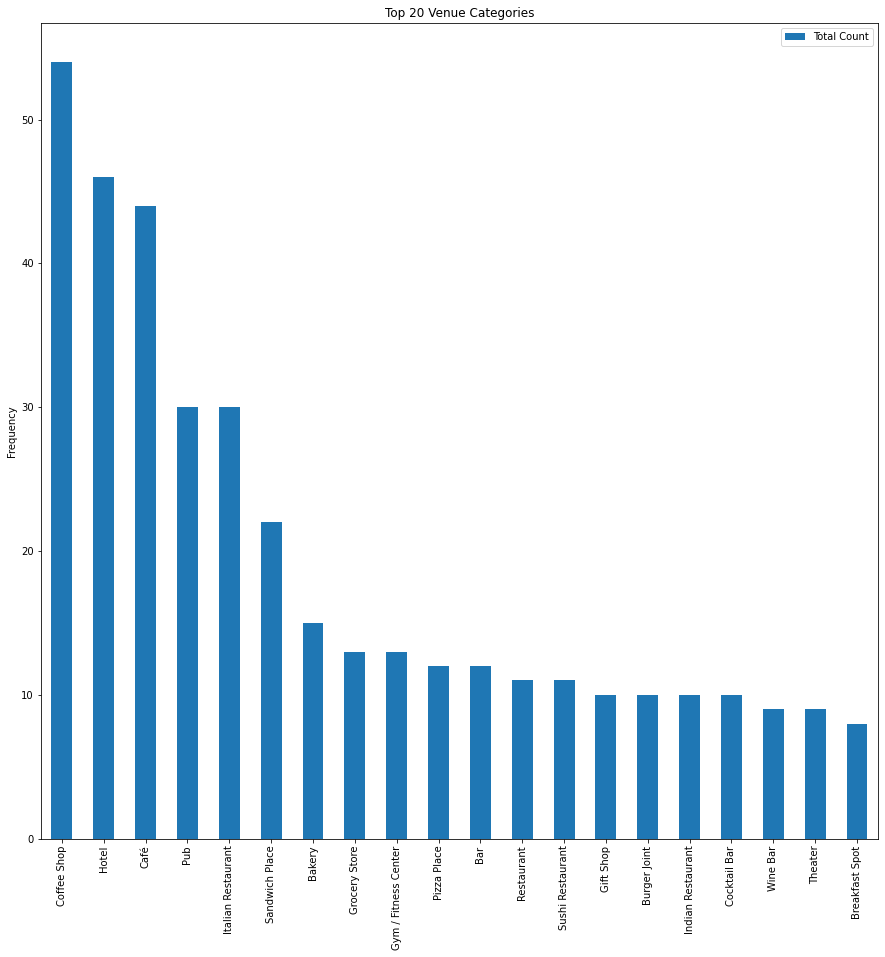

In [27]:
# Bar plot of the top 20 venue categories
top20_count_overall = railway_grouped_count.head(20)
top20_count_overall.plot(kind='bar',
                        figsize=(15,15),
                         title='Top 20 Venue Categories',
                       )

plt.ylabel('Frequency')

plt.show()

The number of each venue category for the top 20 categories for each railway station can be shown in the table below

In [28]:
#add line data to the categories data
station = lndn_10[['Railway Station']]
station

sort = railway_grouped.merge(station, on = 'Railway Station')

category_list = sort.groupby('Railway Station').sum()

top_venues = top_venue_count.index
station_venues = category_list[top_venues].reset_index()
station_venues

,Railway Station,Coffee Shop,Hotel,Café,Pub,Italian Restaurant,Sandwich Place,Bakery,Grocery Store,Gym / Fitness Center,Pizza Place,Bar,Restaurant,Sushi Restaurant,Gift Shop,Burger Joint,Indian Restaurant,Cocktail Bar,Wine Bar,Theater,Breakfast Spot
0,Highbury and Islington,9,0,10,9,5,1,4,2,1,1,1,0,1,1,0,1,3,0,0,0
1,London Bridge,6,2,0,3,4,1,2,1,1,1,1,3,1,0,2,0,1,2,0,0
2,London Euston,4,2,2,1,2,2,0,0,3,0,1,0,2,0,0,3,1,0,2,2
3,London King's Cross,3,4,4,1,0,0,1,1,0,2,1,1,0,2,1,1,0,2,0,2
4,London Liverpool Street,4,3,3,1,1,2,1,1,3,2,0,2,1,2,1,1,4,1,0,1
5,London Paddington,8,19,13,4,5,2,2,3,1,1,1,0,2,0,0,2,0,1,0,0
6,London St Pancras International,3,5,5,0,0,0,0,1,1,1,0,1,1,2,0,1,0,2,0,3
7,London Stratford,4,2,0,6,2,3,1,2,1,3,2,0,0,1,2,0,0,0,0,0
8,London Victoria,5,4,3,3,9,9,1,1,2,1,0,1,3,1,1,0,1,1,4,0
9,London Waterloo,8,5,4,2,2,2,3,1,0,0,5,3,0,1,3,1,0,0,3,0


The summary above provides a second tool with which decisions can be made as to where to locate a business close to any of the railway stations.

## Railway Station Clustering

K-means clustering is utilised to obtain 4 clusters 

In [29]:
# set number of clusters
kclusters = 3

railway_grouped_clustering = ldn_grouped.drop('Railway Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(railway_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 2, 0, 2, 2, 0, 0, 0])

A table is shohwn to include the clusters along with the top venues for each railway station

In [30]:
station_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stations_merged = lndn_10

stations_merged = stations_merged.join(station_venues_sorted.set_index('Railway Station'), on = 'Railway Station')

stations_merged.head()

,Railway Station,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,London Waterloo,51.502838,-0.112801,0,Coffee Shop,Hotel,Bar,Café,Korean Restaurant,Restaurant,Concert Hall,Bakery,Beer Bar,Theater
1,London Victoria,51.494733,-0.144580,0,Italian Restaurant,Sandwich Place,Coffee Shop,Theater,Hotel,Pub,Sushi Restaurant,Café,Mediterranean Restaurant,Chinese Restaurant
2,London Liverpool Street,51.518043,-0.081773,0,Food Truck,Cocktail Bar,Coffee Shop,French Restaurant,Café,Hotel,Gym / Fitness Center,Sandwich Place,Gift Shop,Chinese Restaurant
3,London Bridge,51.508049,-0.087672,0,Coffee Shop,Italian Restaurant,Seafood Restaurant,Restaurant,Pub,Scenic Lookout,Burger Joint,Steakhouse,Hotel,Wine Bar
4,London Paddington,51.517086,-0.177542,2,Hotel,Café,Coffee Shop,Italian Restaurant,Pub,Greek Restaurant,Grocery Store,Bakery,Fast Food Restaurant,Sushi Restaurant


In [31]:
# Map of clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stations_merged['Latitude'], stations_merged['Longitude'], stations_merged['Railway Station'], stations_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
stations_merged.loc[stations_merged['Cluster Labels'] == 0, stations_merged.columns[[0] + list(range(4, stations_merged.shape[1]))]]

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,London Waterloo,Coffee Shop,Hotel,Bar,Café,Korean Restaurant,Restaurant,Concert Hall,Bakery,Beer Bar,Theater
1,London Victoria,Italian Restaurant,Sandwich Place,Coffee Shop,Theater,Hotel,Pub,Sushi Restaurant,Café,Mediterranean Restaurant,Chinese Restaurant
2,London Liverpool Street,Food Truck,Cocktail Bar,Coffee Shop,French Restaurant,Café,Hotel,Gym / Fitness Center,Sandwich Place,Gift Shop,Chinese Restaurant
3,London Bridge,Coffee Shop,Italian Restaurant,Seafood Restaurant,Restaurant,Pub,Scenic Lookout,Burger Joint,Steakhouse,Hotel,Wine Bar
5,London Euston,Coffee Shop,Indian Restaurant,Gym / Fitness Center,Sandwich Place,Sushi Restaurant,Italian Restaurant,Hotel,Café,Beer Bar,Museum
6,London Stratford,Pub,Coffee Shop,Pizza Place,Clothing Store,Sandwich Place,Burger Joint,Grocery Store,Bar,Italian Restaurant,General Entertainment


Common types of venues in Cluster 1 are hospitality, and recreational venues

In [33]:
stations_merged.loc[stations_merged['Cluster Labels'] == 1, stations_merged.columns[[0] + list(range(4, stations_merged.shape[1]))]]

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Highbury and Islington,Café,Pub,Coffee Shop,Italian Restaurant,Bakery,Cocktail Bar,Park,Middle Eastern Restaurant,Grocery Store,Seafood Restaurant


Common types of venues in Cluster 2 are hospitality venues, receational venues, and stores which are in a residential area

In [34]:
stations_merged.loc[stations_merged['Cluster Labels'] == 2, stations_merged.columns[[0] + list(range(4, stations_merged.shape[1]))]]

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,London Paddington,Hotel,Café,Coffee Shop,Italian Restaurant,Pub,Greek Restaurant,Grocery Store,Bakery,Fast Food Restaurant,Sushi Restaurant
7,London St Pancras International,Café,Hotel,Coffee Shop,Breakfast Spot,Wine Bar,Gift Shop,Sushi Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Plaza
8,London King's Cross,Hotel,Café,Coffee Shop,Pizza Place,Wine Bar,Gift Shop,Thai Restaurant,Breakfast Spot,Grocery Store,Tapas Restaurant


Cluster 3 mainly consists of hospitality, and fitness venues

The clustering of these stations based on their similar characteristics might aid in selecting a location for a business. Any apparent opportunities close to any of the railway stations can be exploited. 